In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn.objects as so


In [46]:
df = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [185]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
group_pclass    category
dtype: object

In [161]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
group_pclass      0
dtype: int64

In [49]:
df_titanik = df

In [170]:
df_titanik

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,group_pclass
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,3
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,3
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,3


In [259]:
median_age=df_titanik.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
median_age

Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [245]:
#df['size'] = df.groupby('c')['type'].transform(len) добавляем медианное значение к пропускам,подумать еще
df_titanik['Age'] = df_titanik.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x : x.fillna(x.median()))

In [269]:
df_titanik.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
group_pclass      0
dtype: int64

In [258]:
df_titanik.iloc[152]

PassengerId                   1044
Survived                         0
Pclass                           3
Name            Storey, Mr. Thomas
Sex                           male
Age                           60.5
SibSp                            0
Parch                            0
Ticket                        3701
Fare                           NaN
Cabin                          NaN
Embarked                         S
group_pclass                     3
Name: 152, dtype: object

In [264]:
mean_fare = df_titanik.groupby(['Embarked','Pclass']).mean(numeric_only = True)['Fare']
mean_fare

Embarked  Pclass
C         1         110.073511
          2          20.120445
          3          10.658700
Q         1          90.000000
          2          11.273950
          3           8.998985
S         1          76.677504
          2          23.056090
          3          13.913030
Name: Fare, dtype: float64

In [280]:
df_titanik['Fare'] = df_titanik['Fare'].fillna(value= 13.913030)

In [281]:
df_titanik.iloc[152]

PassengerId                   1044
Survived                         0
Pclass                           3
Name            Storey, Mr. Thomas
Sex                           male
Age                           60.5
SibSp                            0
Parch                            0
Ticket                        3701
Fare                      13.91303
Cabin                          NaN
Embarked                         S
group_pclass                     3
Name: 152, dtype: object

In [283]:
df_titanik.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
group_pclass      0
dtype: int64

In [290]:
average_pclass_survived = df_titanik.groupby('Embarked')['Survived'].mean()
print(f':С какого порта больше выживших {average_pclass_survived}')


:С какого порта больше выживших Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64


In [291]:
average_pclass_survived = df_titanik.groupby('Pclass')['Survived'].mean()
print(f': {average_pclass_survived}')


: Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


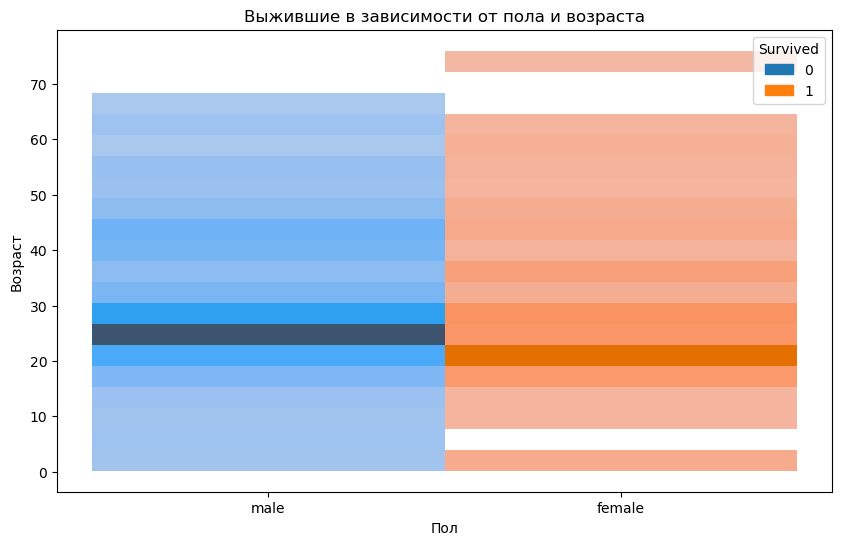

In [349]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_titanik, x="Sex",y = 'Age', hue="Survived")
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.title('Выжившие в зависимости от пола и возраста')
plt.show()

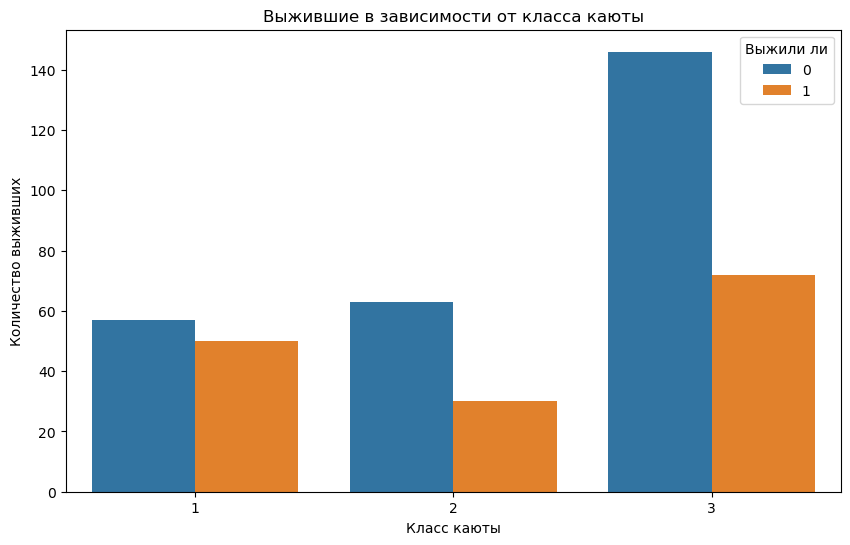

In [302]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_titanik, x='Pclass', hue='Survived')
plt.title('Выжившие в зависимости от класса каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество выживших')
plt.legend(title='Выжили ли')
plt.show()

In [174]:
df_titanik['Parch'].value_counts()
#Parch: Количество родителей или детей на борту «Титаника» для соответствующего пассажира.

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [362]:
df_titanik['SibSp'].value_counts()
#SibSp: Количество братьев и сестер или супругов на борту «Титаника» у соответствующего пассажира.

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [380]:
#s_comma = pd.Series(['яблоко,груша', 'апельсин,банан'])
#s_comma.str.split(',', expand=True)
df_titanik_name = df_titanik['Name']

In [386]:
name = df_titanik_name.str.split(',', expand = True)
name

,0,1
0,Kelly,Mr. James
1,Wilkes,Mrs. James (Ellen Needs)
2,Myles,Mr. Thomas Francis
3,Wirz,Mr. Albert
4,Hirvonen,Mrs. Alexander (Helga E Lindqvist)
...,...,...
413,Spector,Mr. Woolf
414,Oliva y Ocana,Dona. Fermina
415,Saether,Mr. Simon Sivertsen
416,Ware,Mr. Frederick
